<a href="https://colab.research.google.com/github/Priyadharshini277/Deep-Learning-/blob/main/cnn_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.8555 - loss: 0.5000 - val_accuracy: 0.9822 - val_loss: 0.0641
Epoch 2/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9807 - loss: 0.0640 - val_accuracy: 0.9862 - val_loss: 0.0491
Epoch 3/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9871 - loss: 0.0386 - val_accuracy: 0.9870 - val_loss: 0.0465
Epoch 4/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9909 - loss: 0.0300 - val_accuracy: 0.9895 - val_loss: 0.0404
Epoch 5/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9897 - val_loss: 0.0376
Epoch 6/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9946 - loss: 0.0186 - val_accuracy: 0.9850 - val_loss: 0.0585
Epoch 7/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 89ms/step - accuracy: 0.9941 - loss: 0.0169 - val_accuracy: 0.9915 - val_loss: 0.0349
Epoch 8/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.9965 - loss: 0.0111 - 

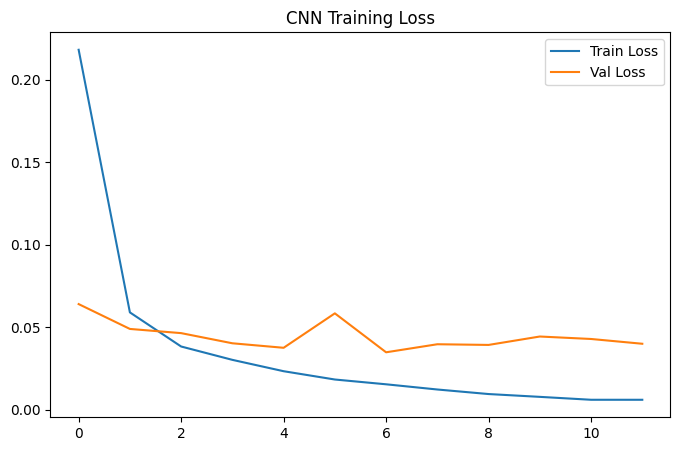

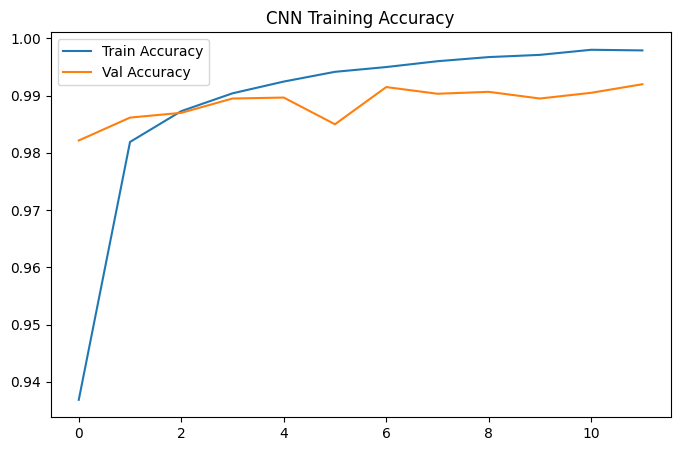

Test Accuracy: 0.992900013923645
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


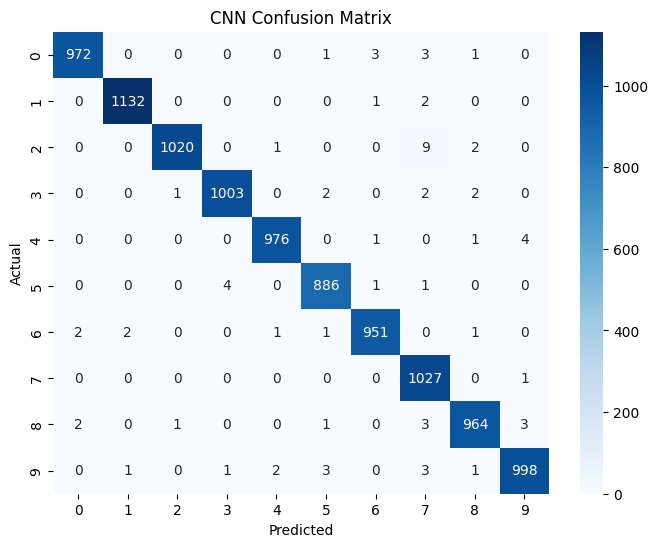

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Saved -> cnn_model.h5


In [2]:
# --------------------------
# PART B — CNN IMPLEMENTATION
# --------------------------

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# --------------------------
# Load MNIST Dataset
# --------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize + reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# --------------------------
# Build CNN Model
# --------------------------
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --------------------------
# Train Model
# --------------------------
history = model.fit(
    x_train, y_train,
    epochs=12,
    batch_size=128,
    validation_split=0.1
)

# --------------------------
# Plot Loss & Accuracy
# --------------------------
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("CNN Training Loss")
plt.savefig("cnn_loss.png")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("CNN Training Accuracy")
plt.savefig("cnn_accuracy.png")
plt.show()

# --------------------------
# Evaluate on Test Data
# --------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

# --------------------------
# Confusion Matrix
# --------------------------
y_pred = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("cnn_confusion_matrix.png")
plt.show()

# --------------------------
# Classification Report
# --------------------------
print(classification_report(y_test, y_pred))

# --------------------------
# Save Model Weights
# --------------------------
model.save("cnn_model.h5")
print("Saved -> cnn_model.h5")
